In [1]:
from IPython.display import Image

### Introduction to Cypher

#### Cypher is ASCII art
Being a declarative language, Cypher focuses on the clarity of expressing what to retrieve from a graph, not on how to retrieve it. You can think of Cypher as mapping English language sentence structure to patterns in a graph. For example, the nouns are nodes of the graph, the verbs are the relationships in the graph, and the adjectives and adverbs are the properties.

#### Nodes
Cypher uses a pair of parentheses like **()**, **(n)** to represent a node, much like a circle on a whiteboard. Recall that a node typically represents an entity in your domain. An anonymous node, **()**, represents one or more nodes during a query processing where there are no restrictions of the type of node or the properties of the node. When you specify **(n)** for a node, you are telling the query processor that for this query, use the variable n to represent nodes that will be processed later in the query for further query processing or for returning values from the query.

#### Labels
Nodes in a graph are typically labeled. Labels are used to group nodes and filter queries against the graph. That is, labels can be used to optimize queries. In the Movie database you will be working with, the nodes in this graph are labeled Movie or Person to represent two types of nodes.

You can filter the types of nodes that you are querying, by specifying a label for a node. A node can have zero or more labels.

Here are simplified syntax examples for specifying a node,
```
()
(variable)
(:Label)
(variable:Label)
(:Label1:Label2)
(variable:Label1:Label2)
```
Notice that a node must have the parentheses. The labels and the variable for a node are optional.

Here are examples of specifying nodes in Cypher,
```
()                 // anonymous node not be referenced later in the query
(p)                // variable p, a reference to a node used later
(:Person)          // anonymous node of type Person
(p:Person)         // p, a reference to a node of type Person
(p:Actor:Director) // p, a reference to a node of types Actor and Director
```
A node can have multiple labels. For example a node can be created with a label of Person and that same node can be modified to also have the label of Actor and/or Director.

In Cypher, you can place a comment (starts with **//**) anywhere in your Cypher to specify that the rest of the line is interpreted as a comment.

#### Examining the data model
When you are first learning about the data (nodes, labels, etc.) in a graph, it is helpful to examine the data model of the graph. You do so by executing `CALL db.schema`, which calls the Neo4j procedure that returns information about the nodes, labels, and relationships in the graph.

Please notice that, you should use to `CALL db.schema.visualization` instead of `CALL db.schema` in the new versions of neo4j.

If you want to see the result, you can follow these steps,
1. `:play Movie Graph`
2. Go to page 2 in the pop-up after running the cypher in the step 1.
3. Run the create statement as you can see in the page.
4. Finally, you can run the cypher `CALL db.schema.visualization`

After these steps, you can see the result as following,

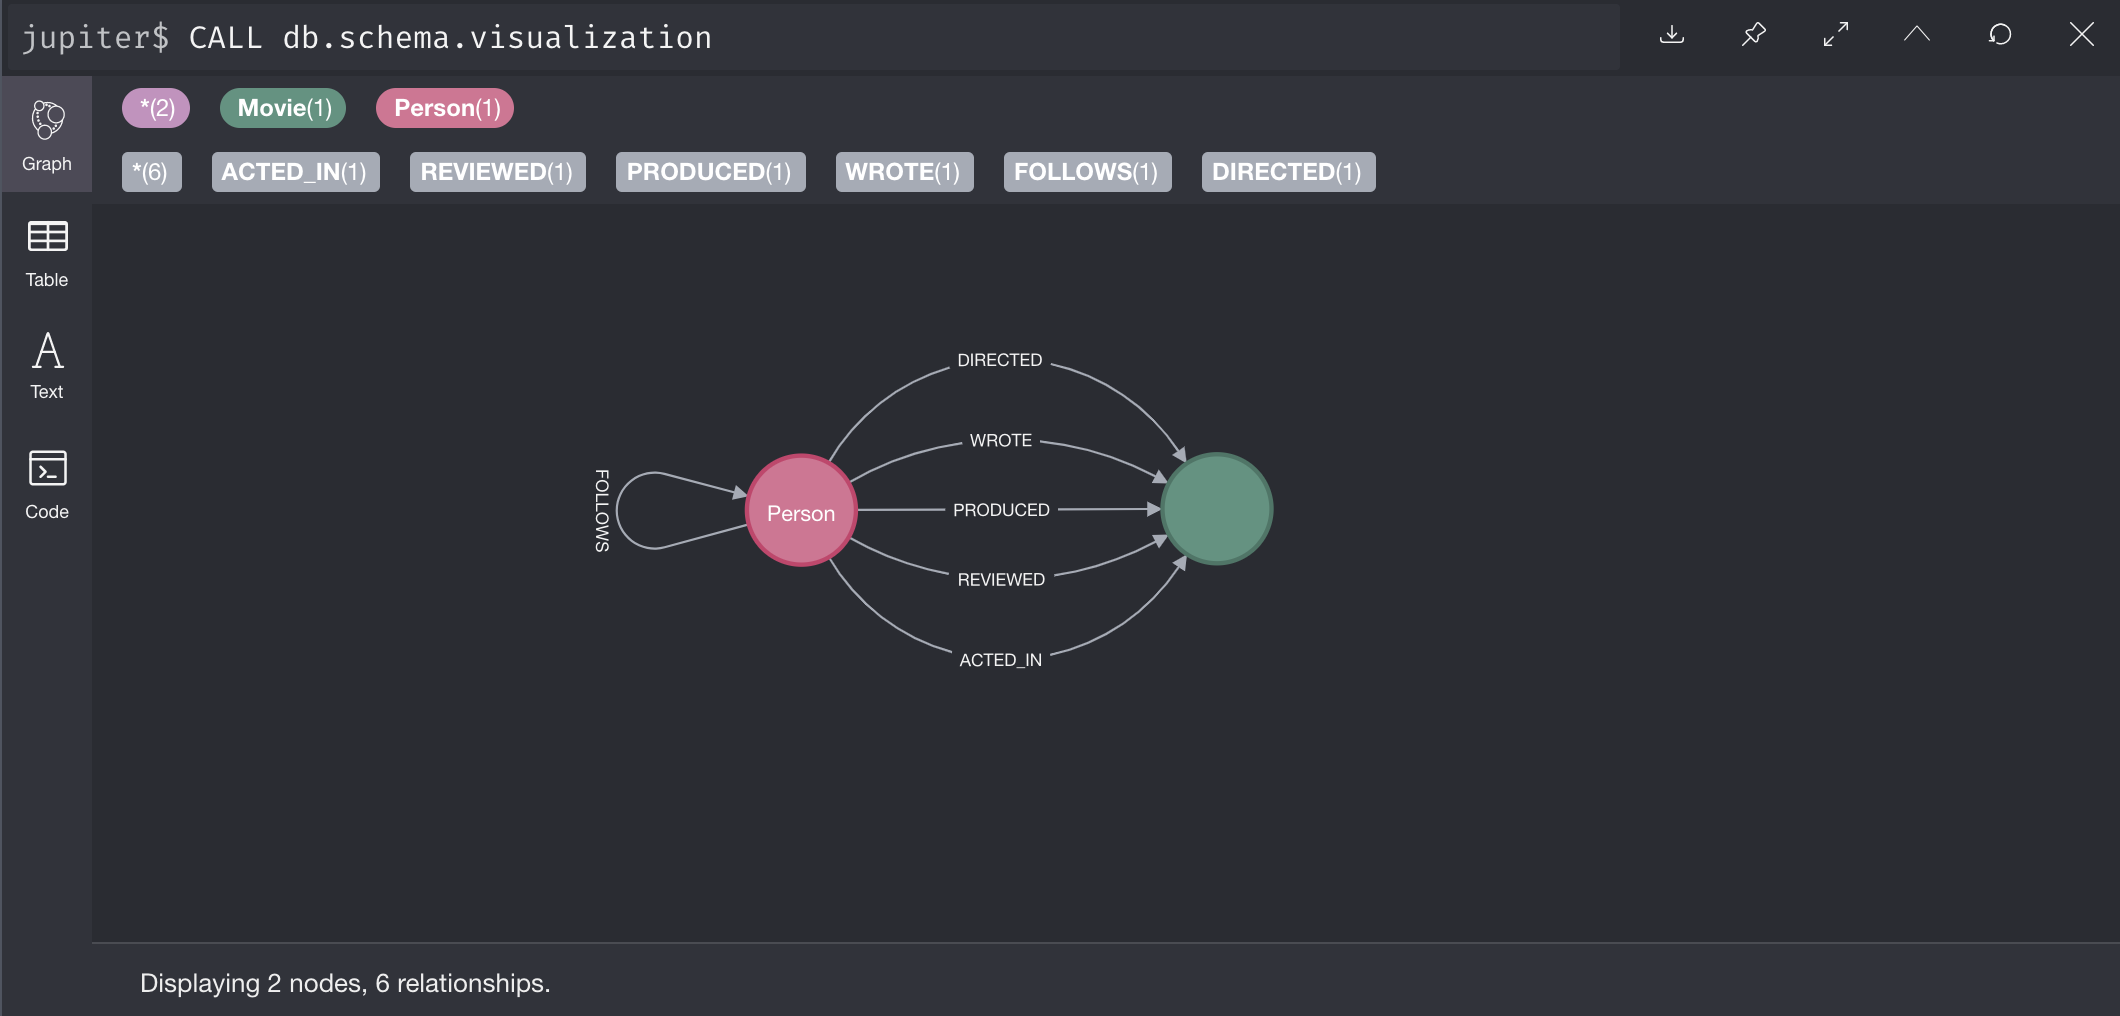

In [2]:
Image('images/db_schema.png', width=800)

#### Using MATCH to retrieve nodes
The most widely used Cypher clause is `MATCH`. The `MATCH` clause performs a pattern match against the data in the graph. During the query processing, the graph engine traverses the graph to find all nodes that match the graph pattern. As part of query, you can return nodes or data from the nodes using the `RETURN` clause. The `RETURN` clause must be the last clause of a query to the graph. 

Here are simplified syntax examples for a query,
```
MATCH (variable)
RETURN variable
```

```
MATCH (variable:Label)
RETURN variable
```

Notice that the Cypher keywords `MATCH` and `RETURN` are upper-case. This coding convention is described in the Cypher Style Guide and will be used in this training. This `MATCH` clause returns all nodes in the graph, where the optional Label is used to return a subgraph if the graph contains nodes of different types. The variable must be specified here, otherwise the query will have nothing to return.

Here are example queries to the Movie database,

```
// returns all nodes in the graph
MATCH (n)
RETURN n
```

```
// returns all person nodes in the graph
MATCH (p:Person)
RETURN p
```

**!!!** When you specify a pattern for a `MATCH` clause, you should always specify a node label if possible. In doing so, the graph engine uses an index to retrieve the nodes which will perform better than not using a label for the `MATCH`.

#### Properties
In Neo4j, a node (and a relationship, which you will learn about later) can have properties that are used to further define a node. A property is identified by its property key. Recall that nodes are used to represent the entities of your business model. A property is defined for a node and not for a type of node. All nodes of the same type need not have the same properties.

Properties can be used to filter queries so that a subset of the graph is retrieved. In addition, with the RETURN clause, you can return property values from the retrieved nodes, rather than the nodes.

#### Examining property keys
As you prepare to create Cypher queries that use property values to filter a query, you can view the values for property keys of a graph by simply clicking the Database icon in Neo4j Browser. Alternatively, you can execute `CALL db.propertyKeys`, which calls the Neo4j library method that returns the property keys for the graph.

#### Retrieving nodes filtered by a property value

You have learned previously that you can filter node retrieval by specifying a label. Another way you can filter a retrieval is to specify a value for a property. Any node that matches the value will be retrieved.

Here are simplified syntax examples for a query where we specify one or more values for properties that will be used to filter the query results and return a subset of the graph,

```
MATCH (variable {propertyKey: propertyValue})
RETURN variable
```

```
MATCH (variable:Label {propertyKey: propertyValue})
RETURN variable
```

```
MATCH (variable {propertyKey1: propertyValue1, propertyKey2: propertyValue2})
RETURN variable
```

```
MATCH (variable:Label {propertyKey: propertyValue, propertyKey2: propertyValue2})
RETURN variable
```

Here is an example where we filter the query results using a property value. We only retrieve Person nodes that have a born property value of 1970,

```
MATCH (p:Person {born: 1970})
RETURN p
```

Here is an example where we specify two property values for the query,

```
MATCH (m:Movie {released: 2003, tagline: 'Free your mind'})
RETURN m
```

And the result of the query as follows in table format,

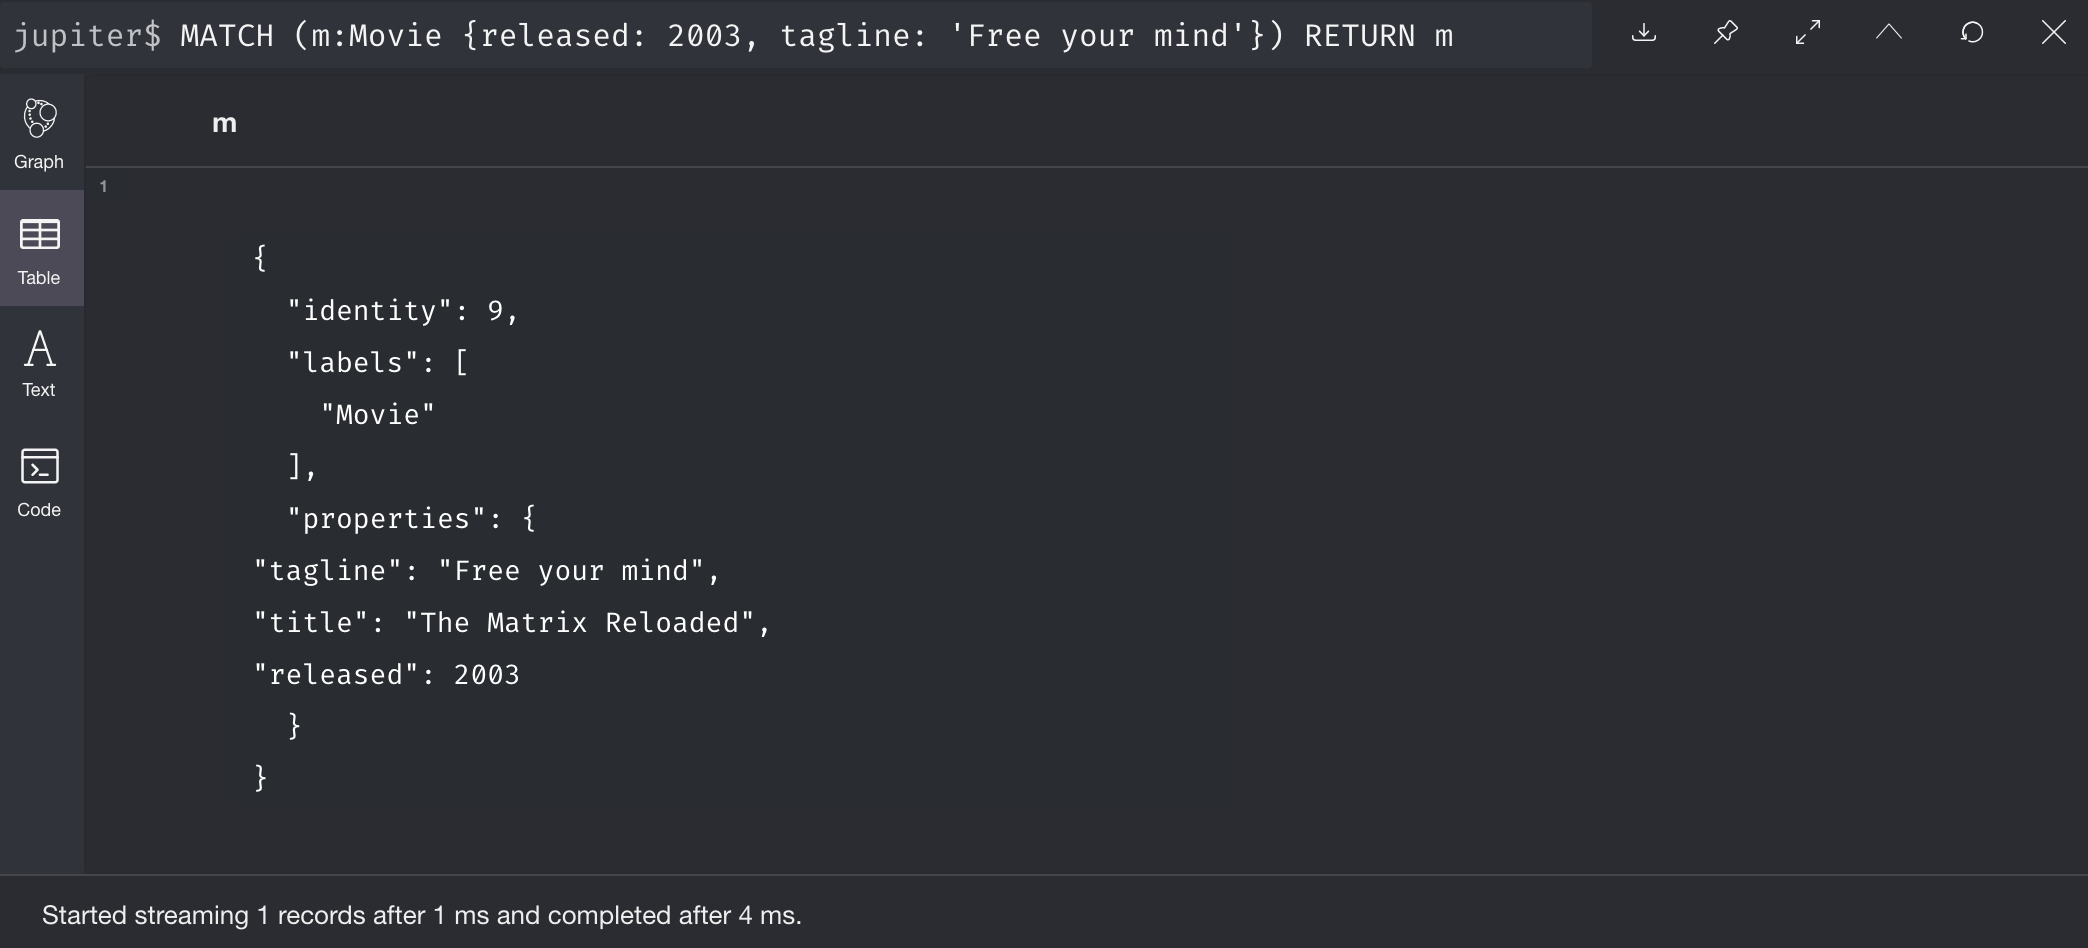

In [3]:
Image('images/property_result.png', width=800)

#### Returning property values

Here are simplified syntax examples for returning property values, rather than nodes,

```
MATCH (variable {prop1: value})
RETURN variable.prop2
```

```
MATCH (variable:Label {prop1: value})
RETURN variable.prop2
```

```
MATCH (variable:Label {prop1: value, prop2: value})
RETURN variable.prop3
```

```
MATCH (variable {prop1:value})
RETURN variable.prop2, variable.prop3
```

In this example, we use the born property to refine the query, but rather than returning the nodes, we return the name and born values for every node that satisfies the query.

```
MATCH (p:Person {born: 1965})
RETURN p.name, p.born
```

#### Specifying aliases

If you want to customize the headings for a table containing property values, you can specify aliases for column headers.

Here is the simplified syntax for specifying an alias for a property value,

```
MATCH (variable:Label {propertyKey1: propertyValue1})
RETURN variable.propertyKey2 AS alias2
```

Here we specify aliases for the returned property values,

```
MATCH (p:Person {born: 1965})
RETURN p.name AS name, p.born AS `birth year`
```

**!!!** If you want a heading to contain a space between strings, you must specify the alias with the back tick character, rather than a single or double quote character. In fact, you can specify any variable, label, relationship type, or property key with a space also by using the back tick character.

#### Relationships
Relationships are what make Neo4j graphs such a powerful tool for connecting complex and deep data. A relationship is a **directed** connection between two nodes that has a **relationship type (name)**. In addition, a relationship can have properties, just like nodes. In a graph where you want to retrieve nodes, you can use relationships between nodes to filter a query.

Here is how Cypher uses ASCII art to specify path used for a query,
```
()         // a node
()--()     // 2 nodes have some type of relationship
()-->()    // the first node has a relationship to the second node
()<--()    // the second node has a relationship to the first node
```

#### Querying using relationships
In your MATCH clause, you specify how you want a relationship to be used to perform the query. The relationship can be specified with or without direction.

Here are simplified syntax examples for retrieving a set of nodes that satisfy one or more directed and typed relationships,

```
MATCH (node1)-[:REL_TYPE]->(node2)
RETURN node1, node2
```

```
MATCH (node1)-[:REL_TYPEA | :REL_TYPEB]->(node2)
RETURN node1, node2
```

#### Using a relationship in a query

Here is an example where we retrieve the Person nodes that have the ACTED_IN relationship to the Movie, The Matrix. In other words, show me the actors that acted in The Matrix.

```
MATCH (p:Person)-[rel:ACTED_IN]->(m:Movie {title: 'The Matrix'})
RETURN p, rel, m
```

For this query, we are using the variable *p* to represent the *Person* nodes during the query, the variable *m* to represent the *Movie* node retrieved, and the variable *rel* to represent the *relationship* for the relationship type, *ACTED_IN*. We return a graph with the *Person* nodes, the *Movie* node and their *ACTED_IN* relationships.

**Important:** You specify node labels whenever possible in your queries as it optimizes the retrieval in the graph engine. That is, you should not specify this same query as,

```
MATCH (p)-[rel:ACTED_IN]->(m {title:'The Matrix'})
RETURN p,m
```

#### Querying by multiple relationships

Here is another example where we want to know the movies that Tom Hanks acted in and directed,

```
MATCH (p:Person {name: 'Tom Hanks'})-[:ACTED_IN|:DIRECTED]->(m:Movie)
RETURN p.name, m.title
```

Suppose you wanted to retrieve the actors that acted in *The Matrix*, but you do not need any information returned about the Movie node. You need not specify a variable for a node in a query if that node is not returned or used for later processing in the query. You can simply use the anonymous node in the query as follows,

```
MATCH (p:Person)-[:ACTED_IN]->(:Movie {title: 'The Matrix'})
RETURN p.name
```

#### Using an anonymous relationship for a query

Suppose you want to find all people who are in any way connected to the movie, *The Matrix*. You can specify an empty relationship type in the query so that all relationships are traversed and the appropriate results are returned. In this example, we want to retrieve all *Person* nodes that have any type of connection to the *Movie* node, with the title, *The Matrix*. This query returns more nodes with the relationships types, *DIRECTED*, *ACTED_IN*, and *PRODUCED*.

```
MATCH (p:Person)-->(m:Movie {title: 'The Matrix'})
RETURN p, m
```

Here are other examples of using the anonymous relationship,

```
MATCH (p:Person)--(m:Movie {title: 'The Matrix'})
RETURN p, m
```

```
MATCH (m:Movie)<--(p:Person {name: 'Keanu Reeves'})
RETURN p, m
```

#### Retrieving the relationship types

There is a built-in function, `type()` that returns the relationship type of a relationship.

```
MATCH (p:Person)-[rel]->(:Movie {title:'The Matrix'})
RETURN p.name, type(rel)
```

#### Retrieving properties for relationships
Recall that a node can have as set of properties, each identified by its property key. Relationships can also have properties. This enables your graph model to provide more data about the relationships between the nodes.

Here is an example from the *Movie graph*. The movie, *The Da Vinci Code* has two people that reviewed it, *Jessica Thompson* and *James Thompson*. Each of these *Person* nodes has the *REVIEWED* relationship to the *Movie* node for *The Da Vinci Code*. Each relationship has properties that further describe the relationship using the *summary* and *rating* properties.

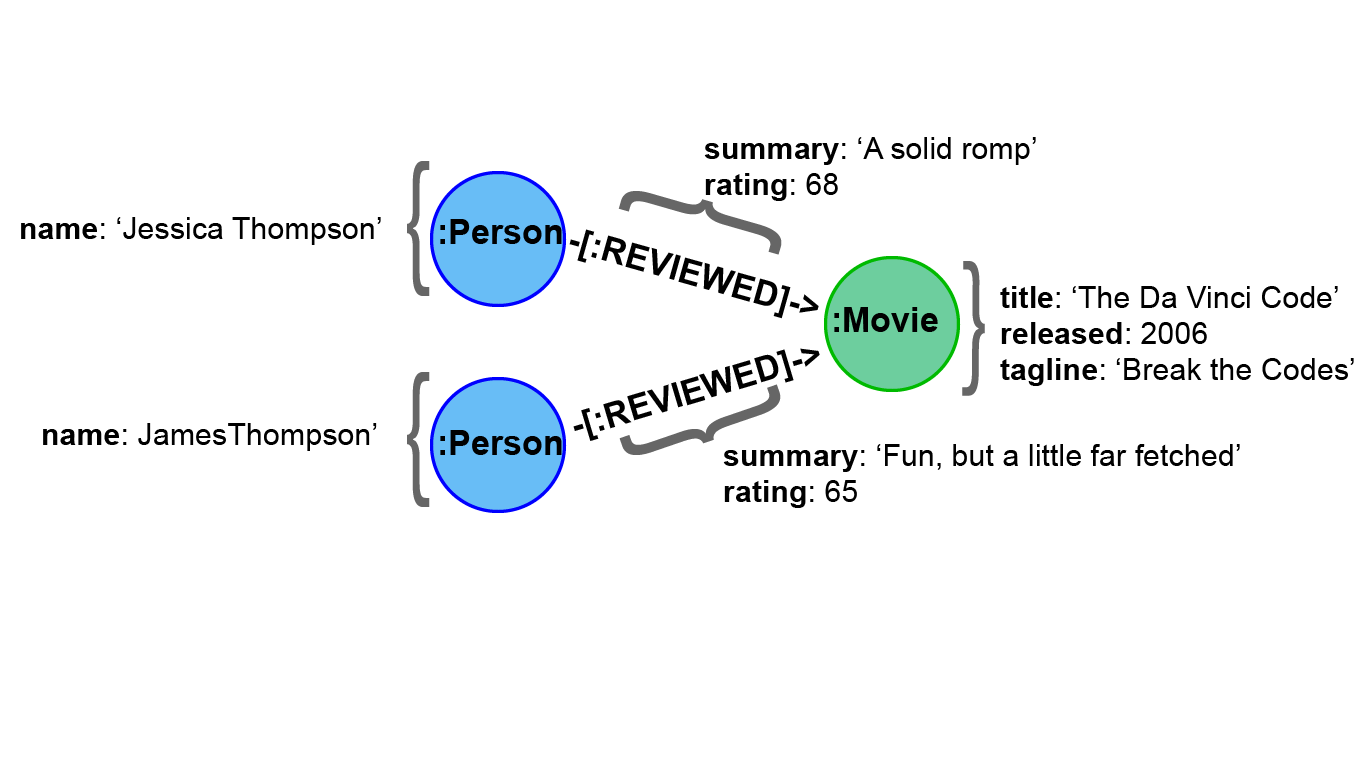

In [4]:
Image('images/reviewed_properties.png', width=800)

Just as you can specify property values for filtering nodes for a query, you can specify property values for a relationship. This query returns the name of of the person who gave the movie a rating of 65,

```
MATCH (p:Person)-[:REVIEWED {rating: 65}]->(:Movie {title: 'The Da Vinci Code'})
RETURN p.name
```

#### Using patterns for queries
Since relationships are directional, it is important to understand how patterns are used in graph traversal during query execution. How a graph is traversed for a query depends on what directions are defined for relationships and how the pattern is specified in the `MATCH` clause.

Here is an example of where the *FOLLOWS* relationship is used in the Movie graph. Notice that this relationship is directional.

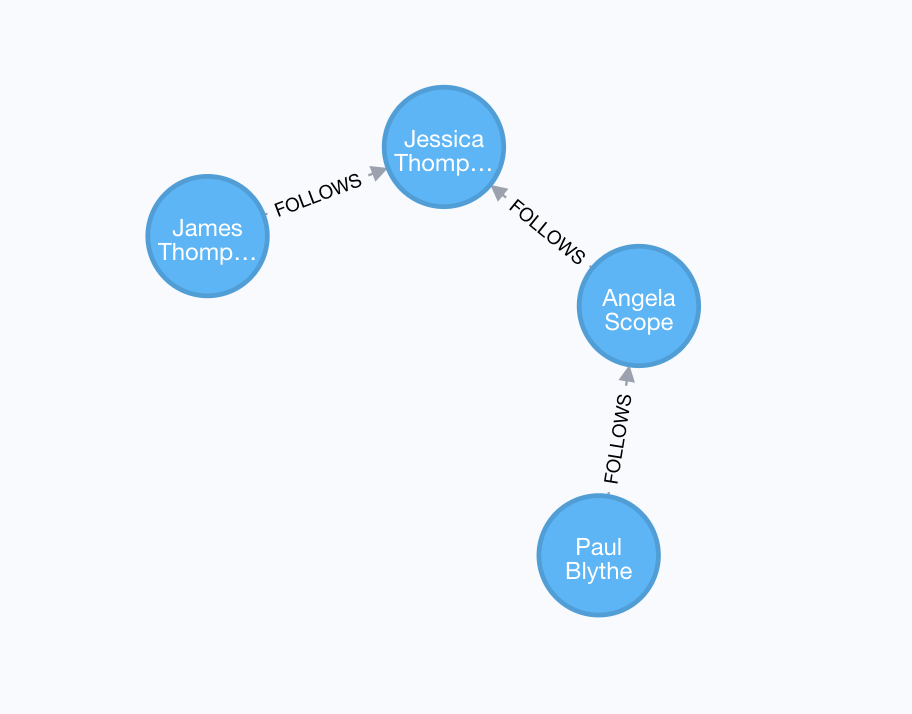

In [5]:
Image('images/follows_relationships.png', width=400)

We can perform a query that returns all *Person* nodes who follow *Angela Scope*:

```
MATCH  (p:Person)-[:FOLLOWS]->(:Person {name:'Angela Scope'})
RETURN p
```

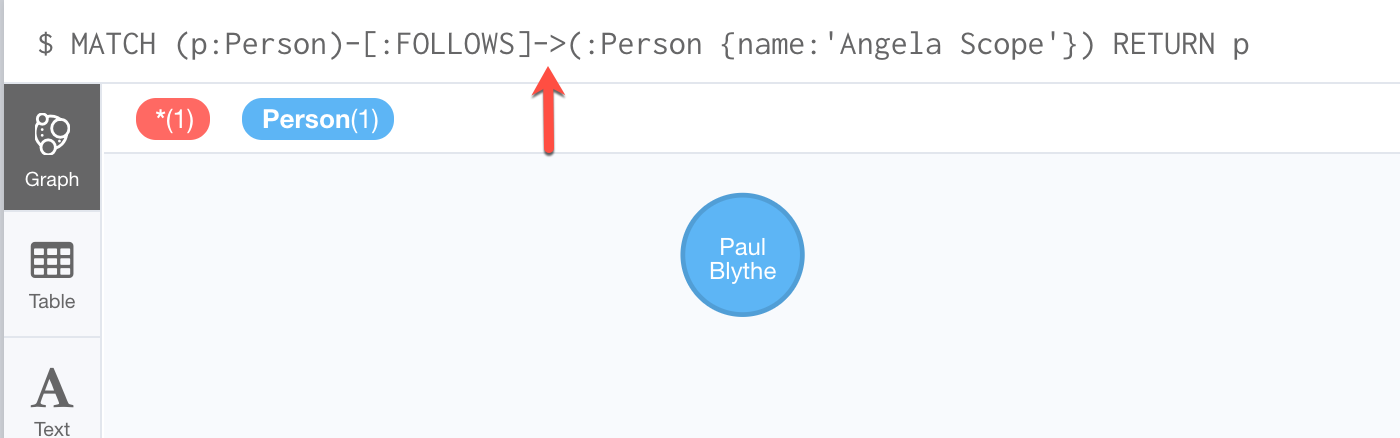

In [6]:
Image('images/angela_followers.png', width=400)

If we reverse the direction in the pattern, the query returns different results,

```
MATCH  (p:Person)<-[:FOLLOWS]-(:Person {name:'Angela Scope'})
RETURN p
```

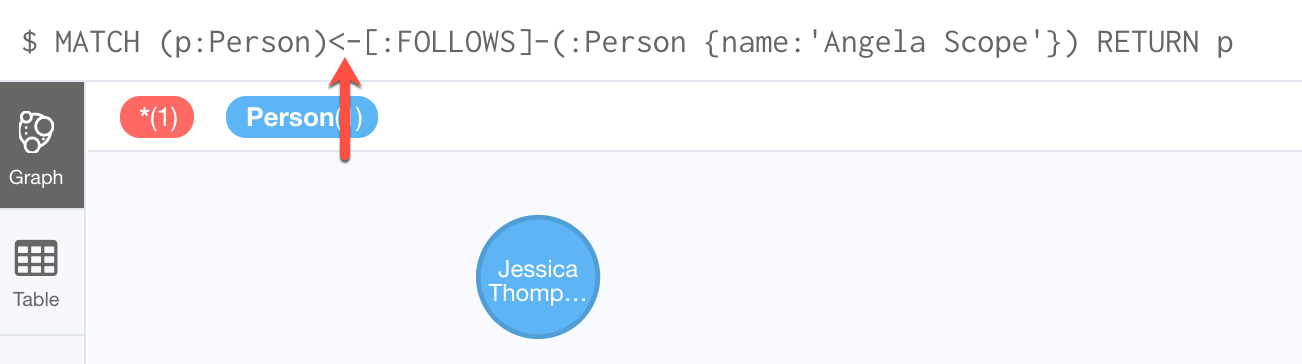

In [7]:
Image('images/followed_by_angela.png', width=400)

#### Traversing relationships

Since we have a graph, we can traverse through nodes to obtain relationships further into the traversal.

For example, we can write a Cypher query to return all followers of the followers of *Jessica Thompson*.

```
MATCH  (p:Person)-[:FOLLOWS]->(:Person)-[:FOLLOWS]->(:Person {name: 'Jessica Thompson'})
RETURN p
```

This query could also be modified to return each person along the path by specifying variables for the nodes and returning them. In addition, you can assign a variable to the path and return the path as follows,

```
MATCH  path = (:Person)-[:FOLLOWS]->(:Person)-[:FOLLOWS]->(:Person {name: 'Jessica Thompson'})
RETURN  path
```

#### Using relationship direction to optimize a query (**IMPORTANT**)
When querying the relationships in a graph, you can take advantage of the direction of the relationship to traverse the graph. For example, suppose we wanted to get a result stream containing rows of actors and the movies they acted in, along with the director of the particular movie.

Here is the Cypher query to do this. Notice that the direction of the traversal is used to focus on a particular movie during the query,

```
MATCH (a:Person)-[:ACTED_IN]->(m:Movie)<-[:DIRECTED]-(d:Person)
RETURN a.name, m.title, d.name
```

##### Here are the Neo4j-recommended Cypher coding standards that we use in this training,

- Node labels are CamelCase and begin with an upper-case letter (examples: *Person*, *NetworkAddress*). Note that node labels are case-sensitive.
- Property keys, variables, parameters, aliases, and functions are camelCase and begin with a lower-case letter (examples: *businessAddress*, *title*). Note that these elements are case-sensitive.
- Relationship types are in upper-case and can use the underscore. (examples: *ACTED_IN*, *FOLLOWS*). Note that relationship types are case-sensitive and that you cannot use the “-” character in a relationship type.
- Cypher keywords are upper-case (examples: `MATCH`, `RETURN`). Note that Cypher keywords are case-insensitive, but a best practice is to use upper-case.
- String constants are in single quotes, unless the string contains a quote or apostrophe (examples: *‘The Matrix’, “Something’s Gotta Give”*). Note that you can also escape single or double quotes within strings that are quoted with the same using a backslash character.
- Specify variables only when needed for use later in the Cypher statement.
- Place named nodes and relationships (that use variables) before anonymous nodes and relationships in your `MATCH` clauses when possible.
- Specify anonymous relationships with `-->`, `--`, or `<--`

#### QUIZ

**Q1)** Suppose you have a graph that contains nodes representing customers and other business entities for your application. The node label in the database for a customer is *Customer*. Each *Customer* node has a property named *email* that contains the customer’s email address. What Cypher query do you execute to return the email addresses for all customers in the graph?

- &#9744; `MATCH (n) RETURN n.Customer.email`
- &#9745; `MATCH (c:Customer) RETURN c.email`
- &#9744; `MATCH (Customer) RETURN email`
- &#9744; `MATCH (c) RETURN Customer.email`

**Q2)** Suppose you have a graph that contains *Customer* and *Product* nodes. A *Customer* node can have a *BOUGHT* relationship with a *Product* node. *Customer* nodes can have other relationships with *Product* nodes. A *Customer* node has a property named *customerName*. A *Product* node has a property named *productName*. What Cypher query do you execute to return all of the products (by name) bought by customer ‘ABCCO’.

- &#9744; `MATCH (c:Customer {customerName: 'ABCCO'}) RETURN c.BOUGHT.productName`
- &#9744; `MATCH (:Customer 'ABCCO')-[:BOUGHT]->(p:Product) RETURN p.productName`
- &#9744; `MATCH (p:Product)<-[:BOUGHT_BY]-(:Customer 'ABCCO') RETURN p.productName`
- &#9745; `MATCH (:Customer {customerName: 'ABCCO'})-[:BOUGHT]->(p:Product) RETURN p.productName`

**Q3)** When must you use a variable in a MATCH clause?

- &#9744; When you want to query the graph using a node label.
- &#9744; When you specify a property value to match the query.
- &#9745; When you want to use the node or relationship to return a result.
- &#9744; When the query involves 2 types of nodes.